In [1]:
#coding:utf-8
#GET

#Render Website (Javascript) using webdriver
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By


# chrome_options = Options() # 啟動無頭模式
# chrome_options.add_argument('--headless')  #規避google bug
# chrome_options.add_argument('--disable-gpu')

#Element Selector
from bs4 import BeautifulSoup as bs

# regex selection
import re

# plot
import matplotlib.pyplot as plt
from scipy.stats import poisson

import numpy as np

# file system
from os import path

In [2]:
url = 'https://www.ptt.cc/bbs/gossiping/M.1621111081.A.034.html?fbclid=IwAR1TAgtxrpFUAQ_V7GPe1ZQgBbsOnsPs3uVYMy4-j5DPEi-eRgHbUWQLOeU'

# check web driver
if not path.exists("./chromedriver"):
    print("Chrome driver not installed.\nInstall it and put the extracted file in the same folder this python file is in.\nhttps://chromedriver.chromium.org/")
    exit()

# connect
driver = webdriver.Chrome("./chromedriver")
driver.get(url)

# I am 18 years old
driver.find_element(By.CSS_SELECTOR, "button[name='yes']").click()

# Extract page source code and turn into soup object for simple query
pageSourceCode = driver.page_source
soup = bs(pageSourceCode, "html.parser")

# close browser
driver.close()

In [3]:
# Select those posted before 12:00PM 
comments_element = soup.select('.push .push-content')[:-126] # comment element
comments = [c.get_text() for c in comments_element] # comment text 

# Extract numbers from comments
guesses = []
for c in comments:
    num=0
    reg = r'\d+' # rule of extraction : \d=digital number, +=continual
    nums = [int(n) for n in re.findall(reg, c)]
    if len(nums) ==0:
        continue
    num = max(nums) # choose the largest number appeared in each comment
    guesses.append(num)
    
guesses = np.array(guesses)

In [4]:
# manually rule out those > 5000
not_outlier = guesses < 5000
guesses = guesses[not_outlier]
max(guesses)

2500

In [5]:
n_ = len(guesses)
max_ = np.max(guesses)
min_ = np.min(guesses)
mean_ = np.mean(guesses)
std_ = np.std(guesses)

print("已移除5000以上數據")
print(f'總數：{n_}')
print(f'最大值：{max_}')
print(f'最小值：{min_}')
print(f'平均值：{mean_}')
print(f'標準差：{std_}')

已移除5000以上數據
總數：1338
最大值：2500
最小值：0
平均值：372.58221225710014
標準差：301.7711561516292


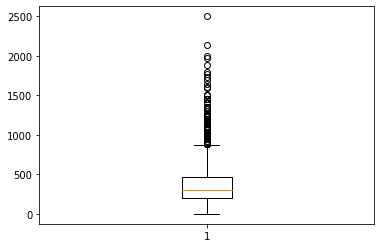

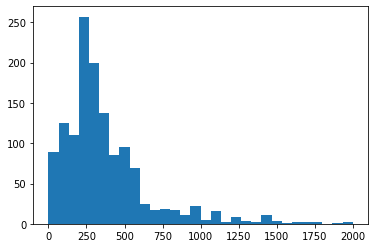

In [6]:
plt.boxplot(guesses)
plt.show()
plt.hist(guesses, bins=30, range=(0,2000))
plt.show()
